In [ ]:
!git clone https://github.com/lseventeen/RF-UNet.git

Cloning into 'RF-UNet'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 147 (delta 60), reused 125 (delta 49), pack-reused 3
Receiving objects: 100% (147/147), 281.78 MiB | 15.29 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Updating files: 100% (22/22), done.


In [2]:
#!pip install albumentations
!pip install bunch
!pip install loguru
#!pip install matplotlib
#!pip install numpy
#!pip3 install opencv_python
#!pip install Pillow
!pip install ruamel.base
#!pip install scikit_learn
!pip install segmentation
!pip install timm

!pip install torchstat
!pip install torchvision
!pip install tqdm
!pip install ttach
!pip install yacs
!pip install ruamel.yaml
!pip install tensorboard
!pip install protobuf

  Preparing metadata (setup.py) ... done
  Created wheel for bunch: filename=bunch-1.0.1-py3-none-any.whl size=7077 sha256=752a9f4396fcb64ef6da0429c2a4ed951e5c13124c23c5f4f688e30b0aa69372
  Stored in directory: /root/.cache/pip/wheels/b8/a9/fe/1ab6d927c80327a67fddb03d620f77b8168c0f6caaac3a5271
Successfully built bunch
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 920.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.0/133.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for segmentation: filename=segmentation-0.2.2-cp310-cp310-linux_x86_64.whl size=553620 sha256=135e853c2fa0c95e6ea15ebf59590db9256f0e43ff449e85fec1710cc1f4f52f
  Stored in directory: /root/.cache/pip/wheels/4b/9b/a8/82ea6c45ff40c9288c4f57ac0c2c54b950312afeb7fdc72b5a
Successfully built segmentation
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 1.4 MB/s eta 0:00:00


In [7]:
#!pip install torch torchvision torchaudio

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path="/content/drive/MyDrive/EIMproject/RETINA/training_pro.zip"
destination_folder="/content/drive/MyDrive/EIMproject/RETINA"
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)


KeyboardInterrupt



In [ ]:
class DictToObject:
    def __init__(self, dictionary):
        for key, value in dictionary.items():
            setattr(self, key, value)

In [3]:
import argparse
from bunch import Bunch
from loguru import logger
from ruamel.yaml import YAML

from torch.utils.data import DataLoader
import sys
sys.path.append('/content/drive/MyDrive/EIMproject/FR')
import models
from dataset import vessel_dataset
from trainer import Trainer
from utils import losses
from utils.helpers import get_instance, seed_torch

In [4]:
# !nvidia-smi
import torch
print(torch.rand(2,3).cuda())

tensor([[0.5435, 0.2166, 0.6549],
        [0.5875, 0.3340, 0.5797]], device='cuda:0')


In [ ]:
    with open('/content/drive/MyDrive/EIMproject/FR/config.yaml', encoding='utf-8') as file:
        yaml = YAML(typ='safe')
        CFG = yaml.load(file)

In [5]:
def main(CFG, data_path, batch_size, with_val=False):
    seed_torch()
    if with_val:
        train_dataset = vessel_dataset(data_path, mode="training", split=0.9)
        val_dataset = vessel_dataset(
            data_path, mode="training", split=0.9, is_val=True)
        val_loader = DataLoader(
            val_dataset, batch_size, shuffle=False, num_workers=8, pin_memory=True, drop_last=False)
    else:
        train_dataset = vessel_dataset(data_path, mode="training")
        print(train_dataset)
    train_loader = DataLoader(
        train_dataset, batch_size, shuffle=True, num_workers=8, pin_memory=True, drop_last=True)

    logger.info('The patch number of train is %d' % len(train_dataset))
    model = get_instance(models, 'model', CFG)
    logger.info(f'\n{model}\n')
    loss = get_instance(losses, 'loss', CFG)
    trainer = Trainer(
        model=model,
        loss=loss,
        CFG=CFG,
        train_loader=train_loader,
        val_loader=val_loader if with_val else None
    )

    trainer.train()


if __name__ == '__main__':
    # parser = argparse.ArgumentParser()
    # parser.add_argument('-dp', '--dataset_path', default="Project_data\\RETINA\\training_pro", type=str,
    #                     help='the path of dataset')
    # parser.add_argument('-bs', '--batch_size', default=16,
    #                     help='batch_size for trianing and validation')
    # parser.add_argument("--val", help="split training data for validation",
    #                     required=False, default=False, action="store_true")
    # args = parser.parse_args()

    with open('/content/drive/MyDrive/EIMproject/FR/config.yaml', encoding='utf-8') as file:
        yaml = YAML(typ='safe')
        CFG = yaml.load(file)
        # CFG = DictToObject(CFG)
    main(CFG, "/content/drive/MyDrive/EIMproject/RETINA", 16,True )


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
2023-12-24 12:18:03.989 | INFO     | __main__:main:15 - The patch number of train is 576
2023-12-24 12:18:04.075 | INFO     | __main__:main:17 - 
FR_UNet(
  (block1_3): block(
    (fuse): feature_fuse(
      (conv11): Conv2d(1, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (conv33): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv33_di): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2), bias=False)
      (norm): BatchNorm2d(32, eps=1e-05,

KeyboardInterrupt: ignored

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Nov__3_17:51:05_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.3, V12.3.103
Build cuda_12.3.r12.3/compiler.33492891_0


In [ ]:
from PIL import Image
import pickle
import matplotlib.pyplot as plt
with open('Project_data\\RETINA\\training_pro\\img_patch_1.pkl', 'rb') as file:
    lista_patch = pickle.load(file)
    list_of_arrays = lista_patch.squeeze().tolist()


In [ ]:
import yaml

# Path to your YAML file
yaml_file_path = 'repo_paper\RF-UNet\config.yaml'

# Open the YAML file and load its contents
with open(yaml_file_path, 'r') as file:
    yaml_data = yaml.safe_load(file)

# Display or work with the loaded YAML data
print(yaml_data['amp'])


True


In [11]:
import os
paolo=os.listdir("/content/drive/MyDrive/EIMproject/RETINA/training_pro")
i=0
print(os.path.dirname("/content/drive/MyDrive/EIMproject/RETINA/training_pro"))
print(os.path.basename("/content/drive/MyDrive/EIMproject/RETINA/training_pro"))
for dir in paolo:
  i=i+len(os.listdir(os.path.join("/content/drive/MyDrive/EIMproject/RETINA/training_pro",dir)))


/content/drive/MyDrive/EIMproject/RETINA
training_pro


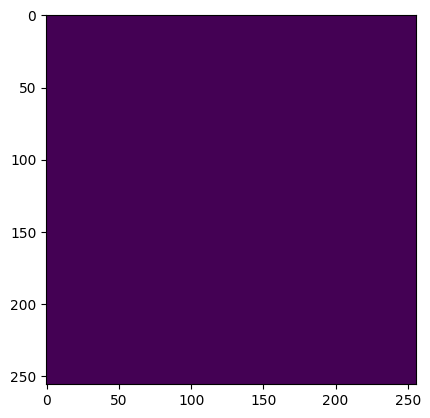

In [ ]:
from PIL import Image
import pickle
import matplotlib.pyplot as plt
with open('Project_data\\RETINA\\training_pro\\Im_30\\img_patch_img30_el80.pkl', 'rb') as file:
    lista_patch = pickle.load(file)
plt.imshow(lista_patch[0,:,:])

In [ ]:
from PIL import Image
import numpy as np

O=Image.open("Project_data\RETINA\Original\\30_A.png")
O=np.array(O)